The california_housing.csv contains data about the houses in California with various data points include longitude, latitude, housing median age,	total rooms, total bedrooms,	population,	households,	median income. The task is to predict the house value based on several features, which is a regression problem.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
house_data = pd.read_csv('/content/california_housing.csv')
house_data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
19995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
19996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
19997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
19998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = house_data.columns.to_list()[:-1] # features names
X = house_data[features] 
Y = house_data['median_house_value']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train) 

LinearRegression()

In [ ]:
pred = my_linear_regression.predict(X_test)
pred

array([249074.2339777 ,  67429.35551381, 103466.87085187, ...,
       319063.94385354,  61928.32004022, 298212.23633466])

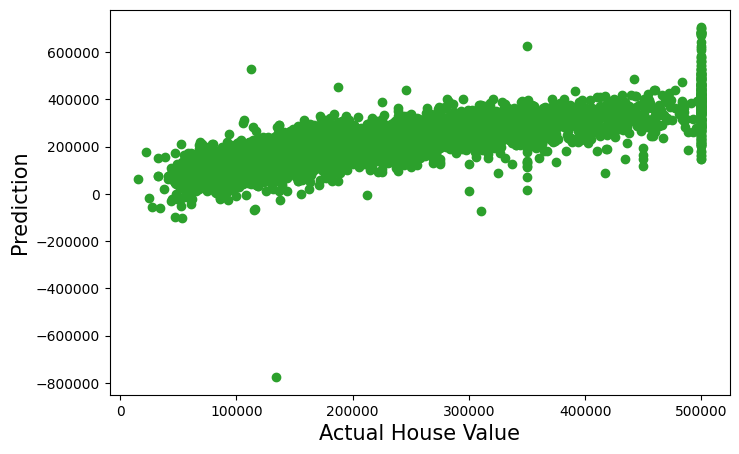

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual House Value', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [ ]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.6395311942579177


In [ ]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is  {}'.format(my_linear_regression.coef_[1]))

The intercept (b_0) is  -3573609.8307387773
The coef (b_1) is  -42699.97834623054
The coef (b_2) is  -42720.951500028095


In [ ]:
house_value_pred = my_linear_regression.predict(X_test)
house_value_pred 

array([249074.2339777 ,  67429.35551381, 103466.87085187, ...,
       319063.94385354,  61928.32004022, 298212.23633466])

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, house_value_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, house_value_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, house_value_pred)))

Mean Absolute Error: 50374.121297888785
Mean Squared Error: 4847397446.398424
Root Mean Squared Error: 69623.25363266518


In [ ]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)
print('MAPE:', MAPE(Y_test, house_value_pred)*100, "%")

MAPE: 29.67005223635856 %


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(house_data)
df_norm = pd.DataFrame(data_norm, columns = house_data.columns.to_list())

In [ ]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features] # features
Y = df_norm['median_house_value'] # response or target variable
my_linear_regression.fit(X, Y)

LinearRegression()

In [ ]:
summary = pd.DataFrame({'Features':features, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,longitude,-0.892046
1,latitude,-0.830818
2,housing_median_age,0.121552
3,total_rooms,-0.654970
4,total_bedrooms,1.518356
5,population,-2.813896
6,households,0.599498
7,median_income,1.206688


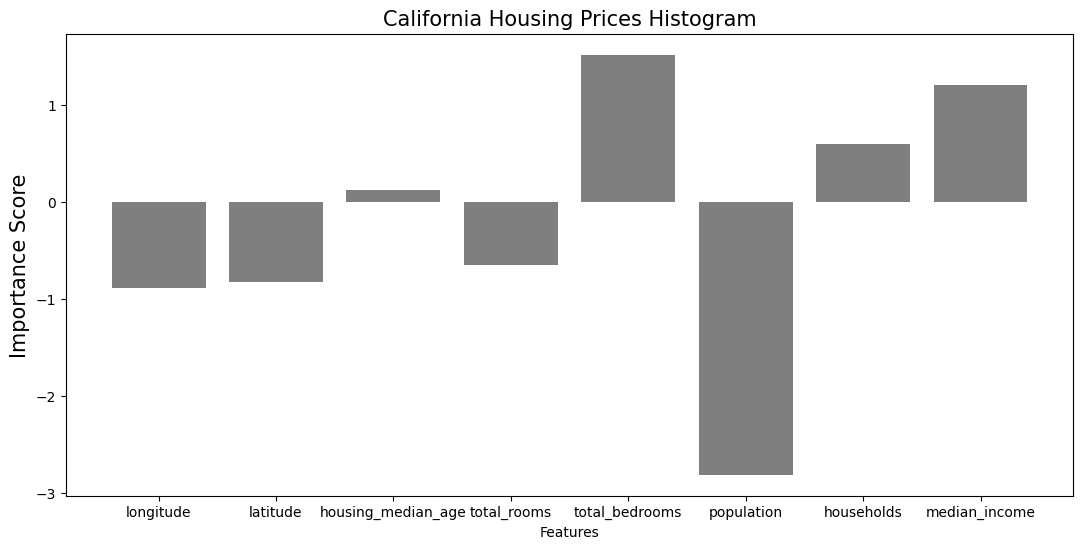

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 6))
# plot feature importance with a bar chart
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:gray') 
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()

R-squared indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. Therefore, 63% of the variance in the house value can be explained by the longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income.

MAE tells us how big of an error we can expect from the forecast on average. In this case, the average error between the predictions and actuals in this dataset is $50374.12

MAPE indicates the average percentage difference between predictions and their intended targets in the dataset. In this case, on average the predictions are 29.6% away from the targets, which is commonly seen as a  good value.